In [42]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import sklearn.datasets as dt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve
import pickle
from sklearn.ensemble import RandomForestClassifier
import scipy.spatial.distance as spd
import sklearn.preprocessing as pp
import numpy.linalg as la
from sklearn.neighbors import KNeighborsClassifier

In [43]:
D = dt.load_breast_cancer()
print(D.DESCR)

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [44]:
X = D.data
Y = D.target

X.shape

(569, 30)

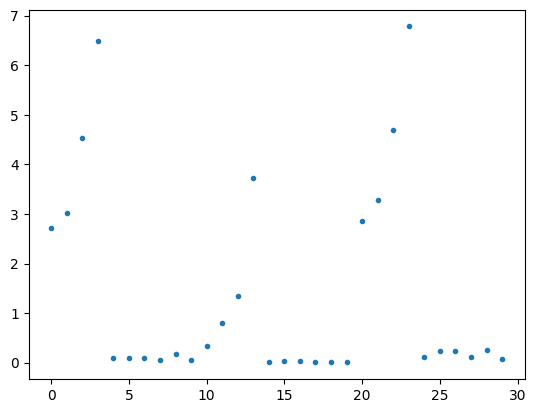

In [45]:
m = np.mean(X, axis=0)

plt.plot(np.log(m+1), '.')

In [46]:
Xn = X-m

np.mean(Xn, axis=0)

array([-1.10608652e-14, -2.84841473e-14, -1.72328467e-14, -3.17883583e-13,
        8.51325454e-17, -6.14500639e-17, -2.46824627e-17,  3.80968446e-17,
       -5.04624657e-17, -1.07315055e-17, -2.75311896e-16, -4.76088608e-16,
        3.76656332e-15, -3.37788770e-14, -2.21794610e-18, -6.67670371e-18,
        2.64873068e-17, -1.67679774e-18, -2.67068148e-18, -7.98003286e-19,
       -1.11826190e-14,  1.08204794e-14, -4.20581359e-14,  2.28772283e-13,
       -1.18753864e-16, -3.46237391e-16,  1.18631915e-16, -1.32680432e-17,
       -1.45314341e-16,  4.52552465e-17])

In [47]:
np.var(Xn, axis=0)

array([1.23970943e+01, 1.84663974e+01, 5.89402799e+02, 1.23625903e+05,
       1.97452073e-04, 2.78428549e-03, 6.34407875e-03, 1.50301462e-03,
       7.50222008e-04, 4.97611152e-05, 7.67671984e-02, 3.03781123e-01,
       4.08071149e+00, 2.06579462e+03, 8.99927022e-06, 3.20139261e-04,
       9.09596835e-04, 3.80055080e-05, 6.82128053e-05, 6.98938631e-06,
       2.33191693e+01, 3.77100918e+01, 1.12714643e+03, 3.23597671e+05,
       5.20403629e-04, 2.47112650e-02, 4.34475982e-02, 4.31314711e-03,
       3.82085668e-03, 3.25636075e-04])

In [48]:
s = 1 / np.std(Xn, axis=0)
s

array([2.84014196e-01, 2.32706713e-01, 4.11902002e-02, 2.84410261e-03,
       7.11654420e+01, 1.89514794e+01, 1.25549711e+01, 2.57939823e+01,
       3.65094340e+01, 1.41760406e+02, 3.60921002e+00, 1.81434390e+00,
       4.95030611e-01, 2.20017096e-02, 3.33346849e+02, 5.58895394e+01,
       3.31570229e+01, 1.62209666e+02, 1.21078504e+02, 3.78251342e+02,
       2.07082530e-01, 1.62843791e-01, 2.97858384e-02, 1.75791271e-03,
       4.38358913e+01, 6.36139717e+00, 4.79752353e+00, 1.52265974e+01,
       1.61778061e+01, 5.54158175e+01])

In [49]:
S = np.diag(s)
S.shape

(30, 30)

In [50]:
Xnn = np.dot(S, Xn.T).T
Xnn.shape

(569, 30)

In [51]:
np.std(Xnn,axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [52]:
ss = pp.StandardScaler().fit(X)
Xn = ss.transform(X)

np.mean(Xn, axis=0)

array([-3.16286735e-15, -6.53060890e-15, -7.07889127e-16, -8.79983452e-16,
        6.13217737e-15, -1.12036918e-15, -4.42138027e-16,  9.73249991e-16,
       -1.97167024e-15, -1.45363120e-15, -9.07641468e-16, -8.85349205e-16,
        1.77367396e-15, -8.29155139e-16, -7.54180940e-16, -3.92187747e-16,
        7.91789988e-16, -2.73946068e-16, -3.10823423e-16, -3.36676596e-16,
       -2.33322442e-15,  1.76367415e-15, -1.19802625e-15,  5.04966114e-16,
       -5.21317026e-15, -2.17478837e-15,  6.85645643e-16, -1.41265636e-16,
       -2.28956670e-15,  2.57517109e-15])

In [53]:
np.std(Xn, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [54]:
D = pickle.load(open('data/MNISTsmall.p', 'rb'))
D.keys()

dict_keys(['data', 'target', 'DESCR', 'target_names', 'foldTrain'])

In [55]:
X = D.data
y = D.target

X.shape

(784, 15000)

In [56]:
Xn = pp.StandardScaler().fit_transform(X.T).T
Xn.shape

(784, 15000)

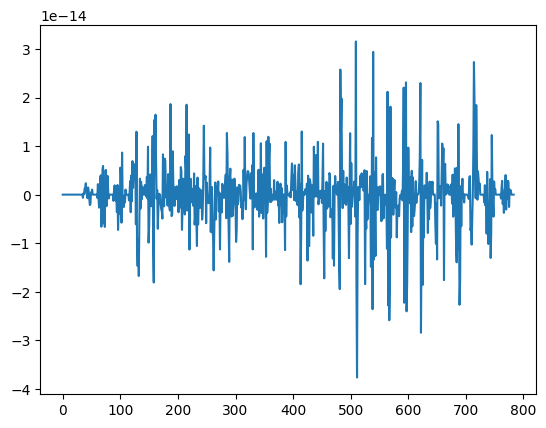

In [57]:
plt.plot(np.mean(Xn, axis=1))

In [58]:
s = np.std(X, axis=1)
s.shape

(784,)

In [59]:
S = np.diag(1/s)

C:\Users\rui\AppData\Local\Temp\ipykernel_14960\686881219.py:1: RuntimeWarning: divide by zero encountered in divide
  S = np.diag(1/s)


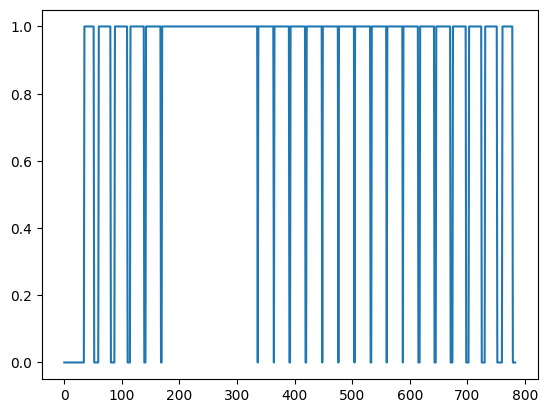

In [60]:
plt.plot(np.std(Xn, axis=1))

In [61]:
X=X*1.
X.dtype

dtype('float64')